# Supervised Learning - Linear Regression

Let's revisit the last portion of Notebook1. We will discuss a linear model that predicts price from using one, multiple, or polynomial features. 
The key takeaways are: 1. Regression model 2. Bias vs. Variance 3. Overfitting vs. underfitting 


In [0]:
# I will demonstrate a simple data science project using the folloing 
# python code. You don't have to understand all the functions and packages at this point of time

# import the needed packages
import sklearn
from sklearn import datasets
from sklearn import linear_model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
#load the data
boston = datasets.load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
DF_boston = pd.DataFrame(boston.data)
DF_boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
DF_boston.columns=boston.feature_names
DF_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
DF_boston['Price'] = boston.target
DF_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


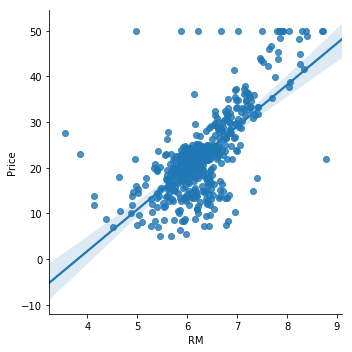

In [8]:
sns.lmplot('RM','Price',data=DF_boston)

## Linear Regression using Gradient Descent 


In [9]:
from IPython.display import IFrame
IFrame(src='https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/', width=900, height=600)

In [0]:
# Create the model
model = linear_model.LinearRegression()

In [11]:
# Train the model
model.fit(DF_boston['RM'].values.reshape(-1,1),DF_boston['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Observe the result
# What is the meaning of model.coef_ 
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 -34.67062077643857
Coefficients: 
 [9.10210898]


## # Calculate Mean Squared Error

In [13]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/5/53/Linear_least_squares_example2.png", width=200, height=100 )

In [14]:
# Calculate Mean Squared Error
diff = DF_boston['Price'] -((np.array(DF_boston[['RM']])).dot(model.coef_)+model.intercept_)
(diff**2).mean() #43

43.60055177116958

## Draw the model

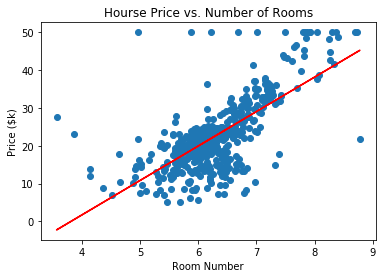

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Hourse Price vs. Number of Rooms")
plt.ylabel('Price ($k)')
plt.xlabel('Room Number')
#plt.grid(True)
#plt.xlim(5,8)
#plt.ylim(0,60)
plt.scatter(DF_boston['RM'].values, DF_boston['Price'].values)

####################################################
####Type your code here to see the ################# 
####prediction line in the diagram (one line) ######
prediction_line =  model.coef_ * DF_boston['RM'].values + model.intercept_
plt.plot(DF_boston['RM'].values, prediction_line, color='red')
####################################################
####################################################
 
plt.show()

## Let's try more features

In [16]:
model.fit(DF_boston[['RM','AGE', 'CRIM']].values.reshape(-1,3),DF_boston['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 -23.605561276868652
Coefficients: 
 [ 8.0328382  -0.05224283 -0.21102311]


In [18]:
(np.array(DF_boston[['RM','AGE', 'CRIM']])).shape

(506, 3)

In [19]:
model.coef_.shape

(3,)

In [0]:
diff = DF_boston['Price'] -((np.array(DF_boston[['RM','AGE', 'CRIM']])).dot(model.coef_)+model.intercept_)

In [21]:
# Compare the result with the model using RM only
(diff**2).mean()  #36

36.83801225358615

## Try Polynomial Features
Why? 

In [0]:
# Scikit learn has it covered 
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=5)

In [0]:
X_poly = polynomial_features.fit_transform(DF_boston[['RM']])

In [24]:
print(X_poly.shape)
X_poly

(506, 6)


array([[1.00000000e+00, 6.57500000e+00, 4.32306250e+01, 2.84241359e+02,
        1.86888694e+03, 1.22879316e+04],
       [1.00000000e+00, 6.42100000e+00, 4.12292410e+01, 2.64732956e+02,
        1.69985031e+03, 1.09147389e+04],
       [1.00000000e+00, 7.18500000e+00, 5.16242250e+01, 3.70920057e+02,
        2.66506061e+03, 1.91484605e+04],
       ...,
       [1.00000000e+00, 6.97600000e+00, 4.86645760e+01, 3.39484082e+02,
        2.36824096e+03, 1.65208489e+04],
       [1.00000000e+00, 6.79400000e+00, 4.61584360e+01, 3.13600414e+02,
        2.13060121e+03, 1.44753046e+04],
       [1.00000000e+00, 6.03000000e+00, 3.63609000e+01, 2.19256227e+02,
        1.32211505e+03, 7.97235374e+03]])

In [35]:
# retrain the model with poly- features
model.fit(X_poly,DF_boston['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 3173.5004433527106
Coefficients: 
 [ 0.00000000e+00 -2.76788936e+03  9.57791192e+02 -1.63717675e+02
  1.38185728e+01 -4.59569815e-01]


In [27]:
# Is MSE getting better? 
diff = DF_boston['Price'] -((X_poly).dot(model.coef_)+model.intercept_)
(diff**2).mean() 

34.581070610188256

## Is the degree of polynomial the bigger the better? 
Depends! 

In [28]:
# let's see the trends 

MSEs = []
for n in range(1,6):
    polynomial_features = PolynomialFeatures(degree=n)
    X_poly = polynomial_features.fit_transform(DF_boston.drop(columns=['Price']))
    model.fit(X_poly,DF_boston['Price'])
    diff = DF_boston['Price'] -((X_poly).dot(model.coef_)+model.intercept_)
    MSE = (diff**2).mean()
    print("n=", n, "  ",MSE)
    MSEs.append(MSE)

n= 1    21.894831181729206
n= 2    6.416168563565402
n= 3    0.17145895066809758
n= 4    2.449760813758845e-19
n= 5    3.549601759680463e-19


In [29]:
DF_boston.drop(columns=['Price']).head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [0]:
#let's plot the result 
import matplotlib.pyplot as plt
%matplotlib inline 

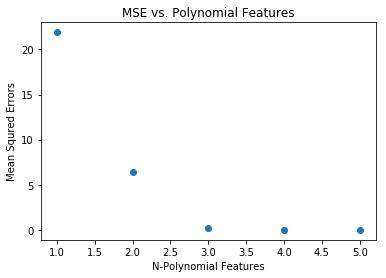

In [31]:
plt.title("MSE vs. Polynomial Features")
plt.ylabel('Mean Squred Errors')
plt.xlabel("N-Polynomial Features")
plt.scatter(range(1,6), MSEs)

## It looks like the answer to the above question is YES 
Now, let's discuss

## Bias vs. Variance

In [32]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/e5e01509ca06e85039e69a64de77561ecb7c50c0")


In [33]:

from IPython.display import IFrame
IFrame(src='http://scott.fortmann-roe.com/docs/BiasVariance.html', width=900, height=600)

In [34]:
Image(url= "https://i.stack.imgur.com/GEJIM.png")